In [ ]:
# Define packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Define constants
R = 0.0083145 # kJ/mol*K

In [ ]:
# Define function to compute the s-l curve
def equation(tma,hfa,tmb,hfb):
    molfracs = np.arange(0.00001,1.00001,0.00001)
    ln_molfracs = [np.log(x) for x in molfracs]
    one_over_t_a = [ ((1/tma)-((x*R)/hfa)) for x in ln_molfracs ]
    one_over_t_b = [ ((1/tmb)-((x*R)/hfb)) for x in ln_molfracs ]
    t_a = [1/x for x in one_over_t_a]
    t_b = [1/x for x in one_over_t_b]
    rev_t_b = [x for x in reversed(t_b)]
    liquidus = [t_a[i] if t_a[i]>=rev_t_b[i]\
                else rev_t_b[i] for i in range(len(t_a))]
    if min(liquidus) in rev_t_b:
        eut_mol_frac = molfracs[rev_t_b.index(min(liquidus))]
        ref = 'a'
    else:
        eut_mol_frac = molfracs[t_a.index(min(liquidus))]
        ref = 'b'
    return(molfracs, liquidus, eut_mol_frac, ref)

The cell above contains the 'meat' of this little script. It computes
the liquidus temperature based on:

\begin{equation}
ln(χ_{i},γ_{i}) = \frac{Δ_{fus}H_{m,i}}{R}\bigg(\frac{1}{T_{m}}-\frac{1}{T}\bigg) + \frac{Δ_{m}C_{p}}{R}\bigg(\frac{T_{m}}{T}-ln\frac{T_{m}}{T}-1\bigg)
\end{equation}

The difference in (molar) heat capacity in liquid and solid phase is ignored, as it is assumed to be *really* small (and typically is for DESs). It is up to the user to know their system, and check whether or not this is true. Furthermore, we assume ideality ($γ=1$). Non-unity values can be easily incorporated, should experimentally (or theoretically!) derived data come available.

Thus the equation becomes:
\begin{equation}
ln(χ_{i}) = \frac{Δ_{fus}H_{m,i}}{R}\bigg(\frac{1}{T_{m}}-\frac{1}{T}\bigg)
\end{equation}

which the script solves for $T$, the liquidus temperature.

I have incorporated a small (gu)es(s)timator for the eutectic point, but values from it shouldn't be taken as gospel. If you ever wish to publish anything where you would like have the exact ideal eutectic point, come talk to me - more accurate methods are available.

\\
If you have DSC data - or some other experimental data about the actual eutectic point - then you are in luck. You can normalize the ideal and the observed eutectic temperatures (following the work of Bruinhorst and Costa-Gomes) with:

\begin{equation}
D_{e} = 100 \% \times \frac{T_{e} - T_{e}^{id}}{T_{e}^{id}}
\end{equation}

where $D_{e}$ is the descriptor for *eutectic depth*, $T_{e}^{id}$ is the eutectic temperature of the ideal mixture, and $T_{e}$ is the experimentally observed eutectic temperature.

The concept of $D_{e}$ might come in handy if you have an array of possible eutectic - or even *deep* eutectic - solvents which you need to compare. It has some descriptive power with regards to deviation from ideality (a **must** for DESs), and helps compare solvents which might have massively different melting temperatures.

Here is a small list of values this script could potentially use, with references:

\begin{array}{|c|} \hline
Name & T_{m} (K) & \Delta_{fus}H_{m} (kJ/mol) & Reference \\ \hline
\hline
Au & 1336 & 12.78 & 1 \\ \hline
Si & 1685 & 50.66 & 1 \\ \hline
ZrF & 1205 & 64.20 & 1 \\ \hline
NaF & 1269 & 32.40 & 1 \\ \hline
KF & 1131 & 22.65 & 1 \\ \hline
LiF & 1121 & 22.30 & 1 \\ \hline
Hydroquinone & 445 & 27.23 & 1 \\ \hline
Camphor & 452 & 6.82 & 1 \\ \hline
Urea & 406 & 14.79 & 1 \\ \hline
Choline~chloride & 597 & 4.32~~(7.77) & 1 \\ \hline
Ethylene~glycol & 261 & 11.62 & 1 \\ \hline
Menthol & 316 & 14.10 & 1 \\ \hline
Thymol & 323 & 20.64 & 1 \\ \hline
Betaine & 514.65 & 17.98 & 2 \\ \hline
Levulinic~acid & 306.2 & 9.22 & 3 \\ \hline
Decanoic~acid & 304.4 & 27.990 & 3 \\ \hline
Salisylic~acid & 432.5 & 23.05 & 4 \\ \hline
Coumarin & 342.2 & 18.63 & 5 \\ \hline
Octadecan-1-ol & 331.34 & 65.35 & 6 \\ \hline
Octadecanoic~acid & 343.67 & 61.36 & 7 \\ \hline
Tetramethylammonium~chloride & 612.87 &  20.49 & 7 \\ \hline
Sorbitol & 366.5 & 30.2 & 8 \\ \hline
Tetrabutylammonium~chloride & 344.0 &  14.69 & 9 \\ \hline
\end{array}

[1] Is there depth to eutectic solvents? https://doi.org/10.1016/j.cogsc.2022.100659 \\
[2] Understanding the Formation of Deep Eutectic Solvents: Betaine as a Universal Hydrogen Bond Acceptor. https://doi.org/10.1002/cssc.202001331 \\
[3] NIST Chemistry WebBook \\
[4] Thermodynamics of cosolvent action: Phenacetin, salicylic acid and probenecid. https://doi.org/10.1002/jps.21497 \\
[5] Energetics of Coumarin and Chromone. https://doi.org/10.1021/jp9026942 \\
[6] Binary solid–liquid equilibrium systems containing fatty acids, fatty alcohols and trilaurin by differential scanning calorimetry. https://doi.org/10.1016/j.fluid.2016.04.008 \\
[7] Measurement and PC-SAFT modeling of solid-liquid equilibrium of deep eutectic solvents of quaternary ammonium chlorides and carboxylic acids. https://doi.org/10.1016/j.fluid.2017.04.007 \\
[8] Heat Capacities and Entropies of Organic Compounds in the Condensed Phase. Volume III. https://doi.org/10.1063/1.555985 \\
[9]  The Role of Charge Transfer in the Formation of Type I Deep Eutectic Solvent-Analogous Ionic Liquid Mixtures. https://doi.org/10.3390/molecules24203687 \\


The usage is simple, and a ready example is given below. You need to input 4 values: Melting temperature of pure $A$, enthalpy of fusion of $A$, melting temperature of pure $B$, and enthalpy of fusion of $B$.

In [ ]:
# Variables
# Change these values to correspond to the mixture of interest.
t_a = 406
H_a = 14.79
t_b = 597
H_b = 4.32

In [ ]:
# Run the function
x,y,eutecticpoint,ref = equation(t_a,H_a,t_b,H_b)

# Get a nicer print out for the eutectic composition
if ref == 'a':
  print("Eutectic point is at x(a) = ",round(eutecticpoint,5))
else:
  print("Eutectic point is at x(b) = ",round(eutecticpoint,5))

Eutectic point is at x(b) =  0.46805


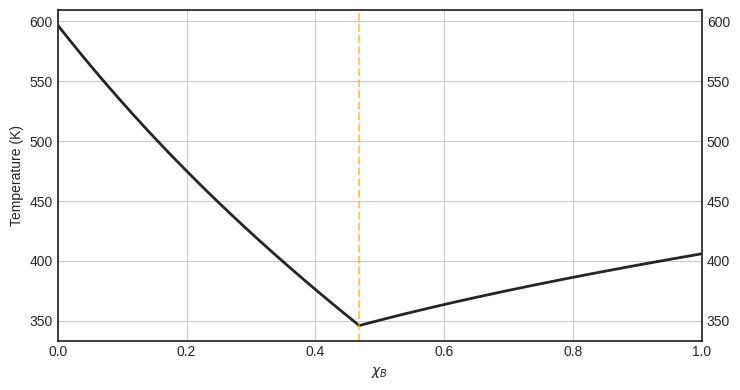

In [ ]:
# Make a figure
fig,ax = plt.subplots(figsize=(7.5,4.0))
plt.style.use('seaborn-v0_8-white')
plt.xlim(0.0,1.0)
ax.tick_params(labelright=True)
plt.grid()
plt.plot(x,y, linewidth=2.0,alpha=0.85,c='k')
plt.axvline(eutecticpoint, ls='--',alpha=0.6,c='orange')
plt.ylabel('Temperature (K)')
if ref == 'a':
  plt.xlabel(r'$\chi_{A}$')
else:
  plt.xlabel(r'$\chi_{B}$')
plt.tight_layout()

In [ ]:
# I suppose you might want to extract the numerical data for line above.
# You can do so by running this cell!

import pandas as pd
numerical_data = pd.DataFrame(
    {'molfrac(A)':x,
     'T(K)':y
    })

numerical_data.to_csv('numericaldata.csv', index=False)
